In [1]:
%matplotlib notebook

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

# One-dimensional Wave Equation

 The one-dimensional wave equation, or linear advection equation, is a hyperbolic, partial differential equation of the form
$$
\frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} = 0
$$

Let $a$ be constant and greater than zero, $a > 0$. In order to find a solution to this PDE, we must define the initial condition for $u(x,t)$ at $t=t_0$ as well as the boundary condition at $x=0$. Let the initial condition be defined as

$$
u(x,t_0) = g(x)
$$

and the boundary condition at $x=0$, 

$$
u(0,t) = u_0
$$

There is an exact solution to this PDE, which can be found using the method of characteristics. If $a > 0$, then we only need the boundary condition at $x=0$. *(Note that if $a < 0$, then we need the boundary condition at $x=L$.)* The boundary condition is defined by the initial condition; as a result, this is an initial value problem. The method of characteristics can be used to find an analytical solution to the above equation. Along a characteristic line, we have

$$
\frac{\textrm{d}x}{\textrm{d} t} = a.
$$

As a result, along a particular curve $x = x(t)$, we have

$$
\frac{\textrm{d}}{\textrm{d} t}\Big[u(x(t),t)\Big] = \frac{\partial u}{\partial t} + \frac{\textrm{d} x}{\textrm{d} t} \frac{\partial u}{\partial x}
 =  \frac{\partial u}{\partial t} + a \frac{\partial u}{\partial x} . 
$$

The value $u$ is therefore constant along the characteristics (the material derivative $du/dt$ is zero, thus u is constant along lines $x-t$ lines). We also know that these characteristic lines are straight, since the curvature (second-derivative) of the characteristics is zero,

$$
\frac{\textrm{d}^2 x}{\textrm{d}t^2} = \frac{\textrm{d}}{\textrm{d}t}\left(\frac{\textrm{d} x}{\textrm{d}t}\right) = \frac{\textrm{d}a}{\textrm{d}t} = 0
$$

Knowing that the value of $u$ is constant along a characteristic, we can define a series of parametric lines that only depend on the
initial value of $u$ at a point emanating from  $(\eta,0)$. Direct integration of

$$
\frac{\textrm{d}x}{\textrm{d} t} = a.
$$

results in the characteristic line
$$
x = a t + \xi
$$

or 

$$
\xi= x - a t
$$

where the solution of $u(x,t)$ of the initial value problem is given by the 

$$
u(x,t) = u(\xi, 0) = u_0(\xi) = u_0(x - ct)
$$

The exact solution is

$$
u(x,t) = g(x - c(t - t_0))
$$

## Analytical Solutions to the Linear Convection PDE

Let us assume, $c = 1$, with an initial condition given by the Gaussian distribution, 

$$
u(x,0) = g(x) = \frac{1}{\sigma \sqrt{2 \pi}} \exp\left( -\frac{(x - \mu)^2}{2\sigma^2}\right)
$$

where $\sigma$ is the standard deviation, and $\mu$ is the mean. The boundary condition is provided by the initial condition, 

$$
u(0,t) = g(0)
$$

In [2]:
def gaussian(x, mu, sigma):
    '''
    Return a Gaussian distribution.
    
    Args:
        x (np.array) : Values of x
        mu (float) : Mean
        sigma (float) : Standard deviation
    Returns:
        f (np.array) : Gaussian distribution as a function of x
    '''
    f = np.zeros_like(x)
    for i in range(len(x)):
        f[i] = 1.0 / sigma / np.sqrt(2.0 * np.pi) * np.exp(- (x[i] - mu)**2 / 2 / sigma**2)
    return f

In [3]:
# Define the mean and standard deviation of the distribution
mean = 0.0
std = 0.1

# Create a mesh of 100 points
x = np.linspace(-1.0,1.0, 100)

# Define the initial condition
u0 = gaussian(x, mean, std)

a = 1.0 # Wave speed
t = 0.5 # Time

# Compute the solution at t = 0.5
un = gaussian(x - a * t, mean, std)

<IPython.core.display.Javascript object>


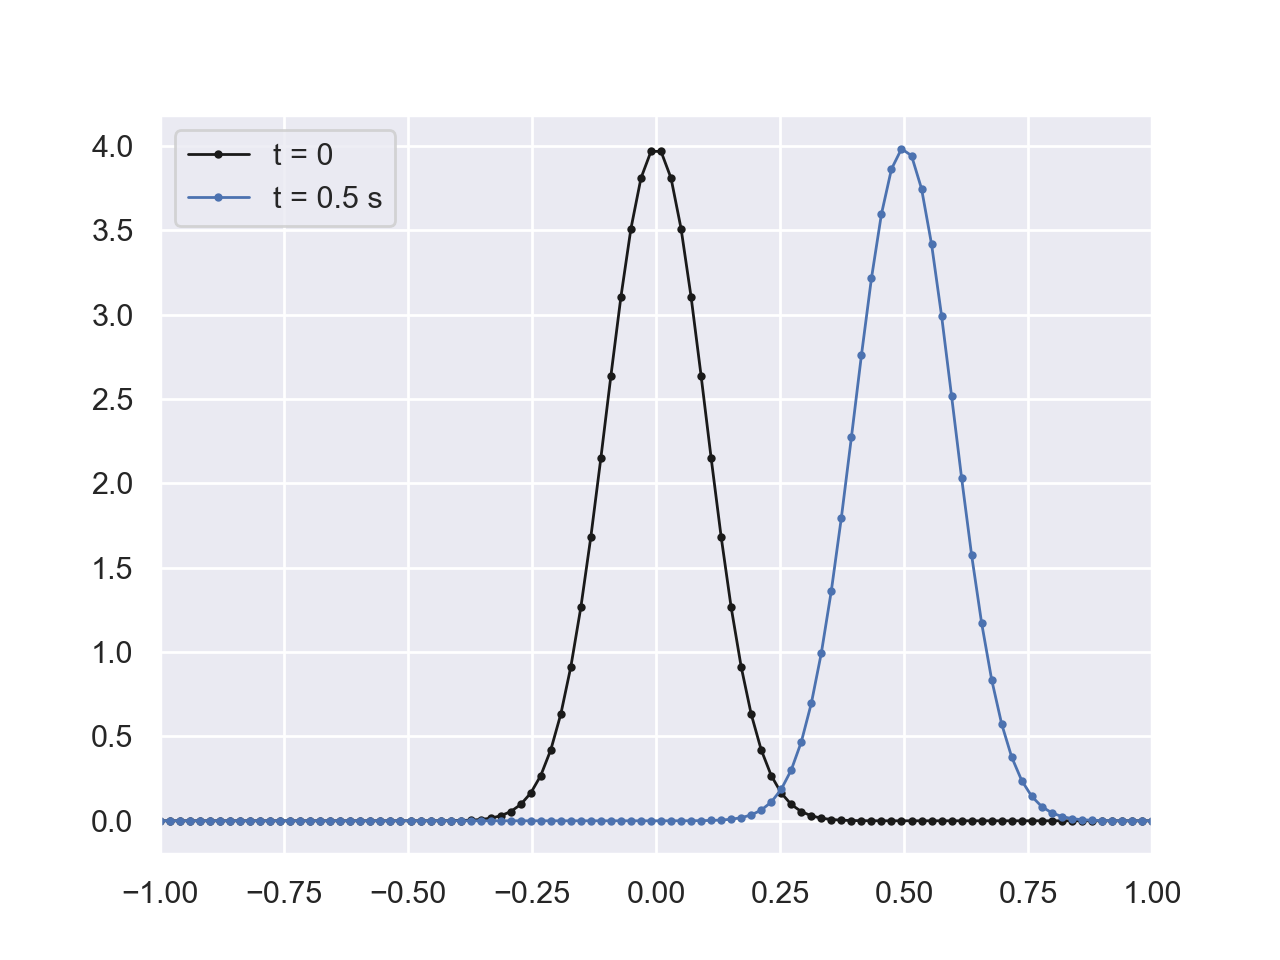

(-1, 1)

In [5]:
# Plot the solution

fig = plt.figure()
ax = fig.add_subplot(111)

line = ax.plot(x, u0, lw=1, c='k', marker='o', ms=2, label=r't = 0')
line = ax.plot(x, un, lw=1, c='b', marker='o', ms=2, label=r't = 0.5 s')

ax.legend()
ax.set_xlim((-1,1))